In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
dataframe = pd.read_csv('loan_data.csv')

In [5]:
dataframe.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
dataframe.describe

<bound method NDFrame.describe of       credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
5                 1         credit_card    0.0788       125.13   
6                 1  debt_consolidation    0.1496       194.02   
7                 1           all_other    0.1114       131.22   
8                 1    home_improvement    0.1134        87.19   
9                 1  debt_consolidation    0.1221        84.12   
10                1  debt_consolidation    0.1347       360.43   
11                1  debt_consolidation    0.1324       253.58   
12                1  debt_consolidation    0.0859       316.11   
13                1      small_business   

In [7]:
dataframe.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


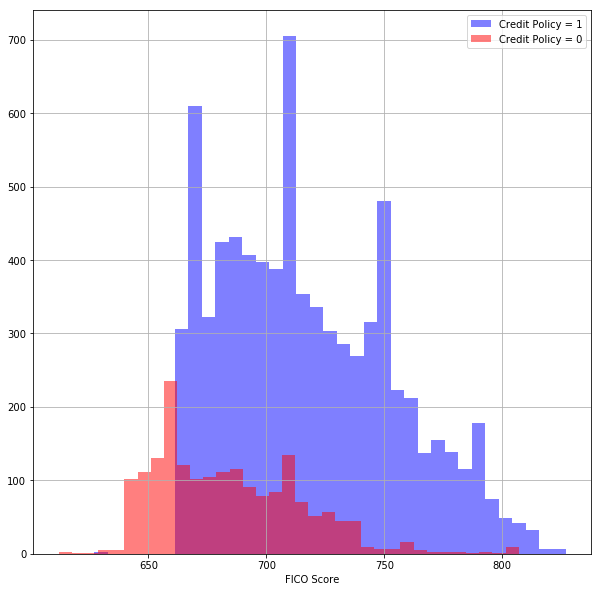

In [13]:
# Create histogram of 2 FICO distributions on top of each other, 1 per credit.policy
plt.figure(figsize=(10,10))
dataframe[dataframe['credit.policy'] == 1]['fico'].hist(bins = 35, color = 'blue', label='Credit Policy = 1', alpha=0.5)
dataframe[dataframe['credit.policy'] == 0]['fico'].hist(bins = 35, color = 'red', label='Credit Policy = 0', alpha=0.5)
plt.xlabel("FICO Score")
plt.legend()

- More people in the dataset belong to Credit Policy 1 than of 0
- People who tend to have a lower FICO score, have a credit poliy of 0

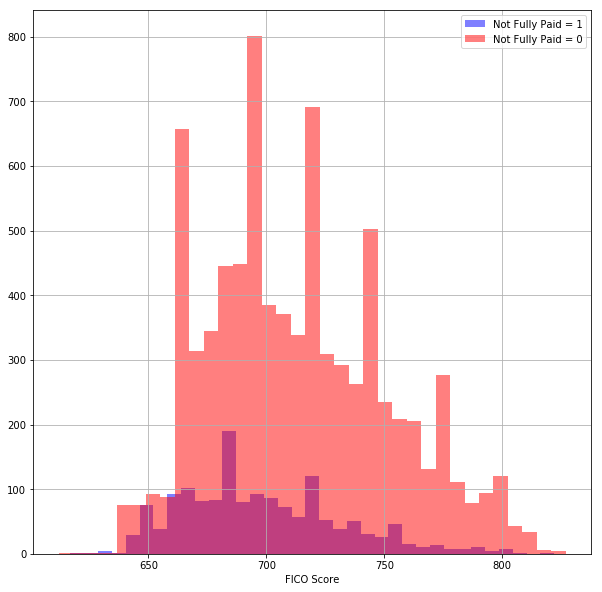

In [15]:
# Create histogram of 2 FICO distributions on top of each other, 1 per class of if Fully paid
plt.figure(figsize=(10,10))
dataframe[dataframe['not.fully.paid'] == 1]['fico'].hist(bins = 35, color = 'blue', label='Not Fully Paid = 1', alpha=0.5)
dataframe[dataframe['not.fully.paid'] == 0]['fico'].hist(bins = 35, color = 'red', label='Not Fully Paid = 0', alpha=0.5)
plt.xlabel("FICO Score")
plt.legend()

- Most people have paid
- Both have a similar distribution
- Spikes. Based on how FICO scores, certain points will have a larger distribution 

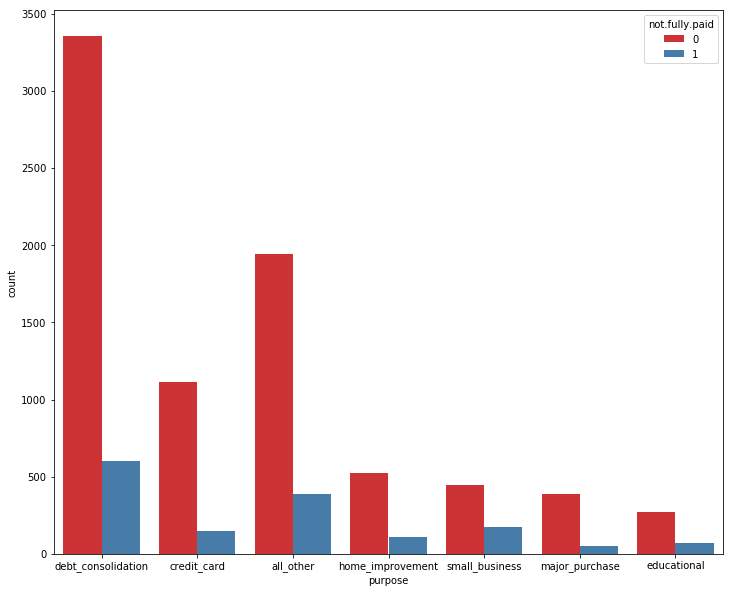

In [20]:
# Countplot showing counts of loans by purpose. It'll give us a better answer to WHY
plt.figure(figsize=(12,10))
sns.countplot(x = 'purpose', hue='not.fully.paid', data=dataframe, palette='Set1')

- Debt Consolidation had more people that paid the loan & also most out of who couldn't. 

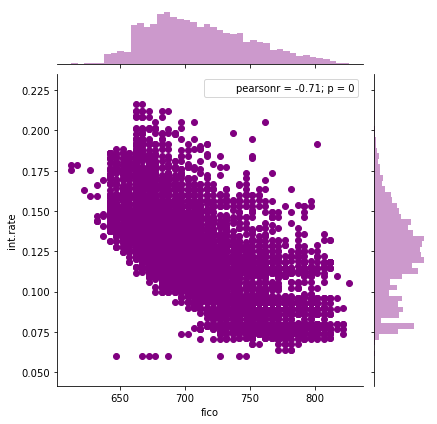

In [22]:
# Visualize the relationship between the FICO score and the interest rate
sns.jointplot(x='fico', y='int.rate', data=dataframe, color='purple')

- As the FICO score increases, you have better interest rate
- If you have a low FICO score, you have bad credit, thus your interest rate is going to go up

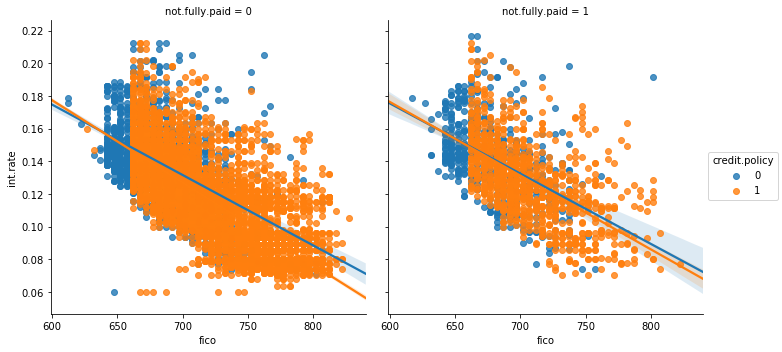

In [26]:
# Correlation between credit policy and the not fully paid class
sns.lmplot(y='int.rate', x='fico', data=dataframe, hue='credit.policy', col='not.fully.paid')

- Class seperation at a FICO score of ~650